# Data Overview

Import Libraries

In [1]:
#Importing all the necessary libraries
## main Libraries
import numpy as np #Numerical Python library for linear algebra and computations
import pandas as pd # Python library for data analysis and data frame

## Datetime , i will need it in feature engineering step
from datetime import date, datetime # for manupulating time and date columns

## code to display all columns
pd.set_option('display.max_columns', None)

## Visualisation libraries
import missingno as msno
import seaborn as sns
import os
%matplotlib inline
import missingno as msno
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.colors import ListedColormap
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.offline import init_notebook_mode, iplot
from mpl_toolkits.mplot3d import Axes3D
from yellowbrick.cluster import KElbowVisualizer

## preprocessing Libraries
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler # For handling categorical column and scaling numeric columns

## decomposition
from sklearn.decomposition import PCA

## # Libraries for clustering and evaluation
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.cluster import KMeans ##, AgglomerativeClustering

## ignore warnings
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)
import warnings
warnings.filterwarnings('ignore') # To prevent kernel from showing any warning

Read Dataset

In [2]:

df=pd.read_excel("/content/marketing_campaign.xlsx")

Basic infromation about data

In [3]:
print('Number of datapoints in the dataset: ', len(df))
print('Number of rows {} and columns {}:' .format(df.shape[0],df.shape[1]))
print('Column names:', df.columns)

Number of datapoints in the dataset:  2240
Number of rows 2240 and columns 29:
Column names: Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')


Observations

Data contains 2240 rows and 29 columns

It has 1 float, 3 object and 25 int columns

Datetime columns have int datatype, need to fix that

Many categorical columns are alredy in int format, like AcceptedCmp1, Response

There are 24 missing values in Income column

There are no duplicate values within data

# EDA

In [4]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [5]:
df.sample(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
324,2607,1953,Graduation,Single,40464.0,0,1,2013-01-11,78,424,17,118,7,23,41,6,8,2,8,8,0,0,0,0,0,0,3,11,0
96,7247,1960,Graduation,Widow,47916.0,0,1,2012-11-22,72,505,0,26,0,0,75,5,7,4,6,6,0,1,0,0,0,0,3,11,0
2104,5802,1972,Basic,Married,14188.0,0,0,2013-02-28,40,2,7,11,16,12,27,1,2,0,4,6,0,0,0,0,0,0,3,11,0


In [6]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [7]:
# Finding the number of unique values present in each column
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [8]:
# Checking if any NaN is present in column or not
df.isna().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                  True
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

In [9]:
df.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

In [10]:
# Checking the shape of the dataset
df.shape

(2240, 29)

In [11]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


Converting Year_Birth and Dt_Customer to datetime format using datetime library

In [12]:
# converting columns to DateTime format
df['Year_Birth'] = pd.to_datetime(df['Year_Birth'], format ='%Y')
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [13]:
df['Income'].fillna(df['Income'].mean(), inplace = True)

Income column have some missing value in it so we will need to fill it by by either mean or median.

<Axes: >

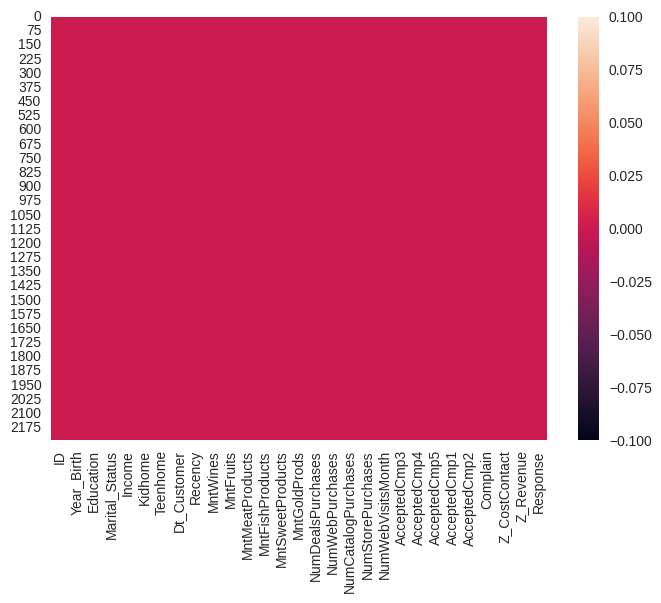

In [14]:
# Checking for null value using heatmap
sns.heatmap(df.isnull())

Statistical information about the data

In [15]:
df.describe(include="number").T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Income,2240.0,52247.251354,25037.797168,1730.0,35538.75,51741.5,68289.75,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0
MntSweetProducts,2240.0,27.062946,41.280498,0.0,1.00,8.0,33.00,263.0


Note :

Income : mean almost equal 52247 and min value equal 1730 and max value equal 666666

     The outliers here may be due to the difference in education level of each customer
Year_Birth : mean almost equal 1969 and min equal 1893 and max equal 1996

age : mean equal 54

Kidhome : min equal 0 (They have no children) and max equal 2

Teenhome : min equal 0 (They don't have teens) and max equal 2

Customers spend more on meat products

Customers spend least on fruits products

In [16]:
df.describe(include="O").T

,count,unique,top,freq
Education,2240,5,Graduation,1127
Marital_Status,2240,8,Married,864


Note :

Education Feature : mode is Graduation and has 5 unique values

Marital_Status Feature : mode is Married and has 8 unique values

Handling Missing Values

let's find if we have missing values in the dataset.

In [17]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

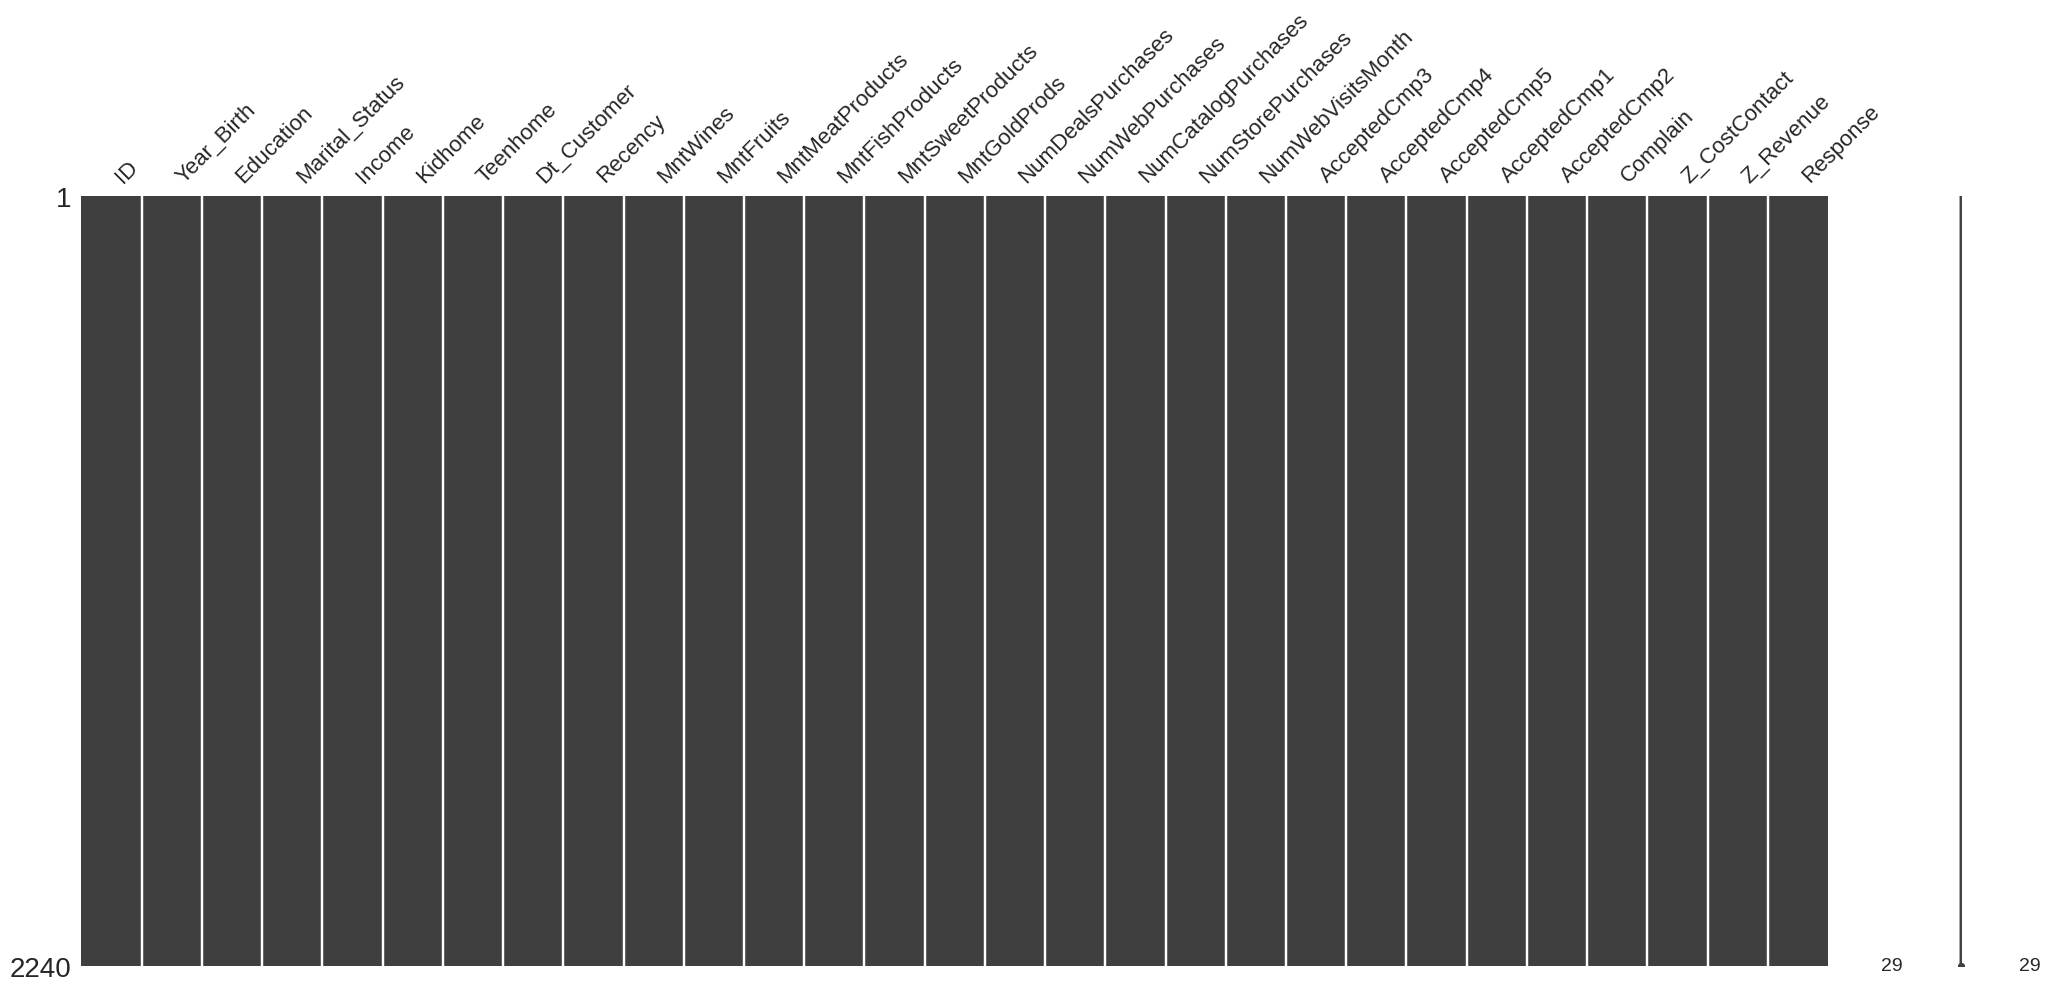

In [18]:
msno.matrix(df);

In [19]:
df = df.dropna()

let's find if we have duplicate rows.

In [20]:

df.duplicated().sum()

0

Feature Engineering

Examining unique values

In [21]:
df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [22]:
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [23]:
df["Dt_Customer"].dt.year.min() , df["Dt_Customer"].dt.year.max()
# we only have data of three years, 2012 to 2014

(2012, 2014)

In [24]:
# Creating Age and Years_Customer ( Amount of years a personn has been customer) columns.
df['Age'] = (df["Dt_Customer"].dt.year.max()) - (df['Year_Birth'].dt.year)
df['Years_Customer'] = (df["Dt_Customer"].dt.year.max()) - (df['Dt_Customer'].dt.year)
df['Days_Customer'] = (df["Dt_Customer"].max()) - (df['Dt_Customer'])

In [25]:
# Total amount spent on products
df['TotalMntSpent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [26]:
# Total number of purchases made
df['TotalNumPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

In [27]:
# Total number of accepted campaigns
df['Total_Acc_Cmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']

In [28]:
#Deriving living situation by marital status
df["Partner"]=df["Marital_Status"].replace({"Married":"Yes", "Together":"Yes", "Absurd":"No", "Widow":"No", "YOLO":"No", "Divorced":"No", "Single":"No","Alone":"No"})

In [29]:
#Segmenting education levels in three groups
df["Education_Level"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

In [30]:
# Total children living in the household
df["Children"] = df["Kidhome"] +  df["Teenhome"]

In [31]:
# adding columns about the day, month and year cutomer joined
df['Year_Joined'] = df['Dt_Customer'].dt.year
df['Month_Joined'] = df['Dt_Customer'].dt.strftime("%B")
df['Day_Joined'] = df['Dt_Customer'].dt.day_name()

In [32]:
# dividing age into groups
df['Age_Group'] = pd.cut(x = df['Age'], bins = [1, 17, 24, 44, 64, 150],
                         labels = ['Under 18','Young adult','Adult','Middel Aged','Senior Citizen'])

In [33]:
df.drop(['ID','Z_CostContact','Z_Revenue','Year_Birth','Dt_Customer'], axis=1, inplace=True)

In [34]:
df['Days_Customer'] = df['Days_Customer'].dt.days.astype('int16')

<Axes: xlabel='Income', ylabel='Count'>

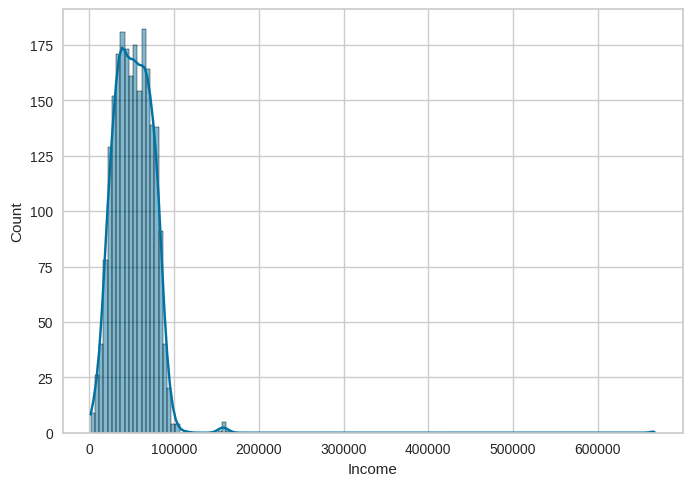

In [35]:
import seaborn as sns
sns.histplot(data=df, x="Income",  kde=True)

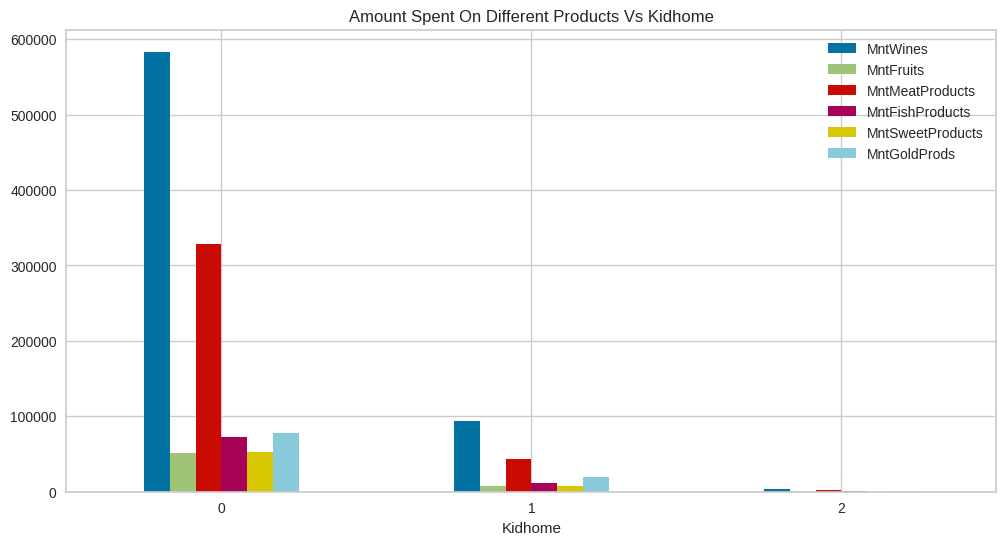

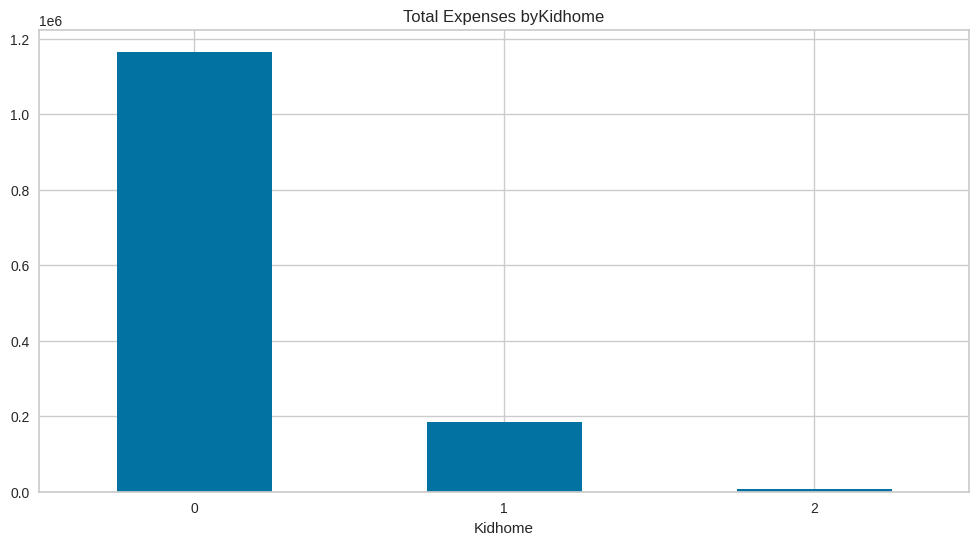

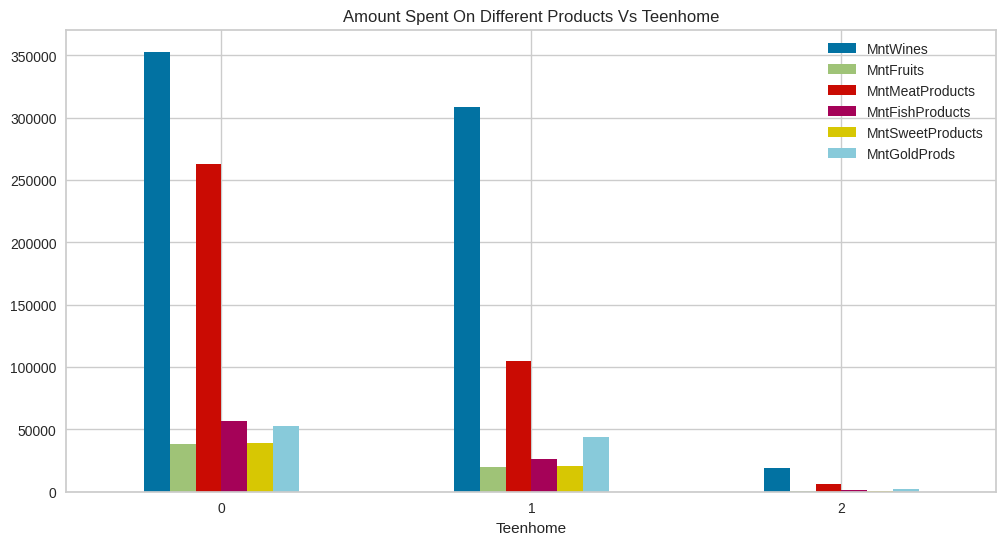

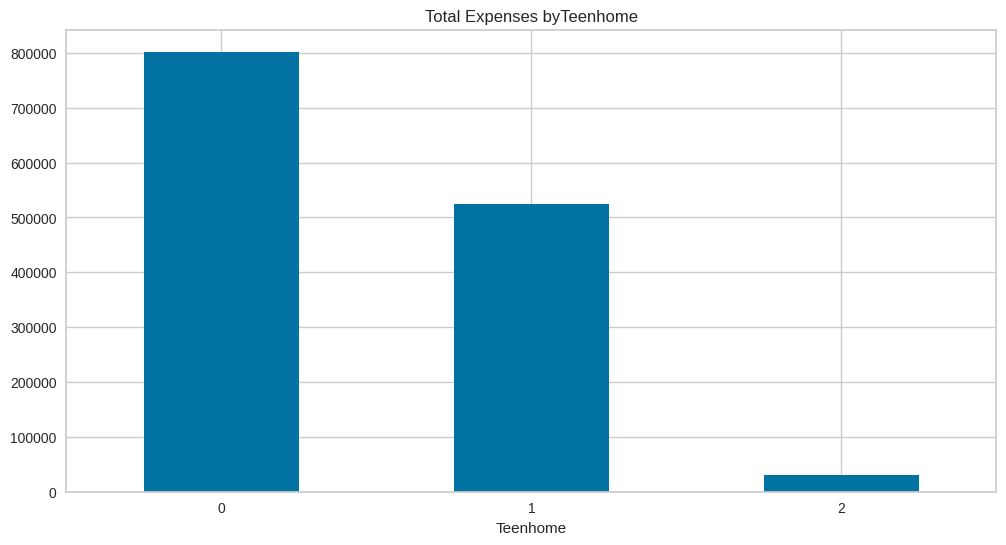

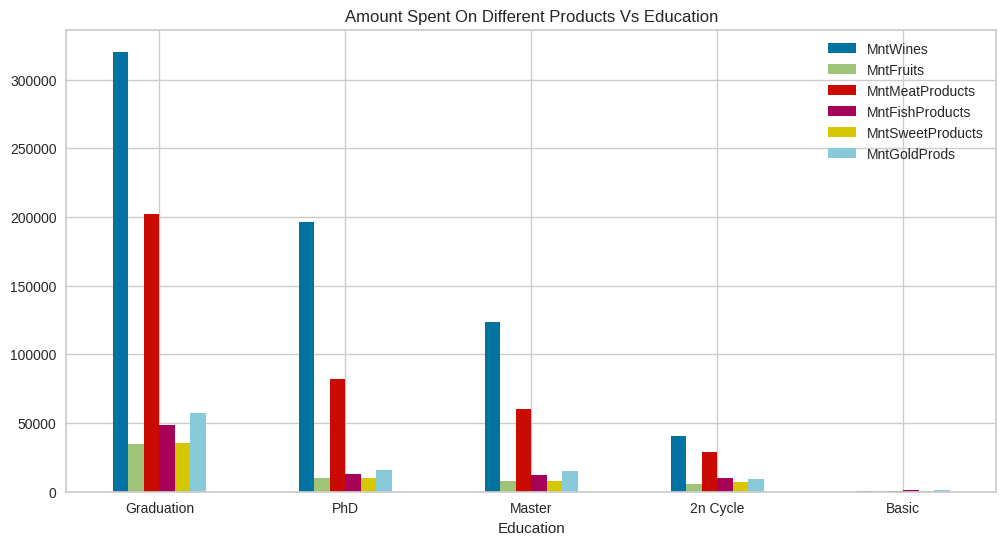

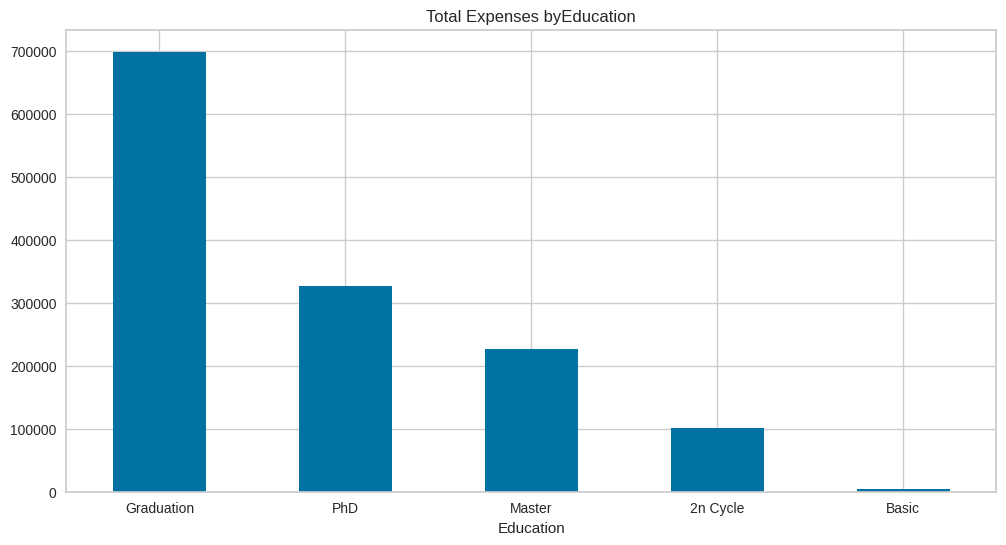

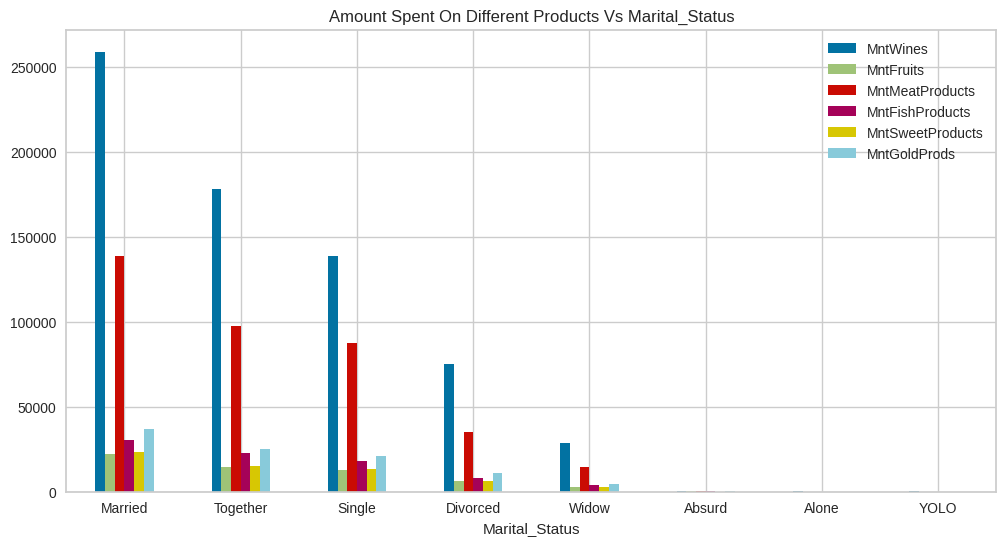

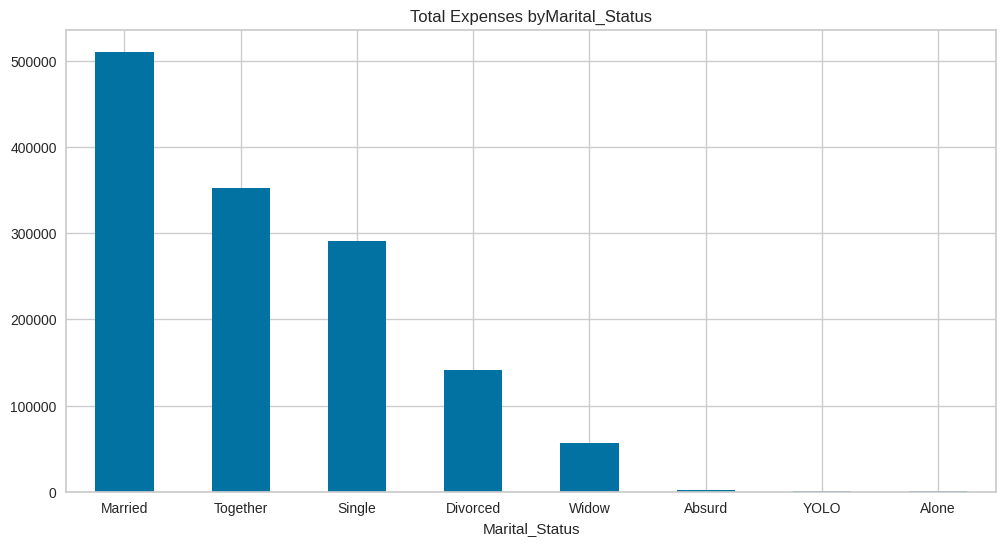

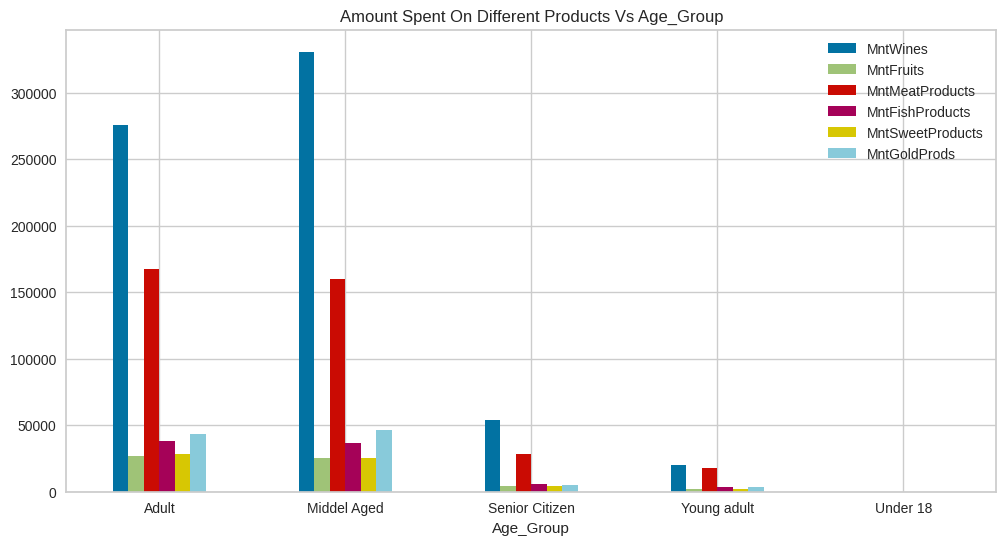

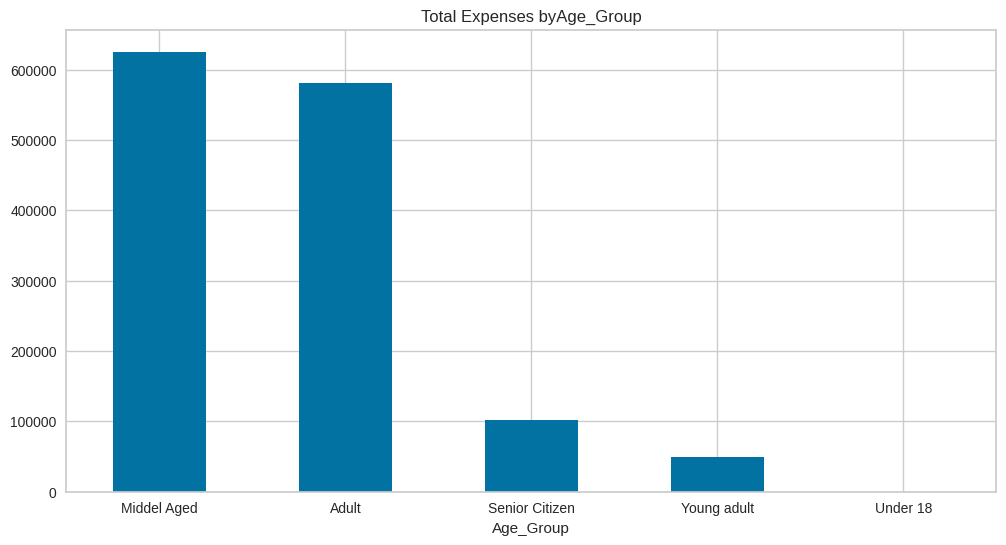

In [36]:
for col in ['Kidhome','Teenhome','Education','Marital_Status','Age_Group']:

    df.groupby(col)[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].sum().sort_values(by='MntSweetProducts' , ascending=False).plot(kind='bar',figsize = (12, 6))
    plt.title('Amount Spent On Different Products Vs '+col)
    plt.xticks(rotation = 360)

    df[[col,'TotalMntSpent']].groupby(col).sum().sort_values(by='TotalMntSpent', ascending=False).plot(kind='bar',legend=None, figsize = (12, 6))
    plt.title('Total Expenses by' + col)
    plt.xticks(rotation = 360)

    plt.show()

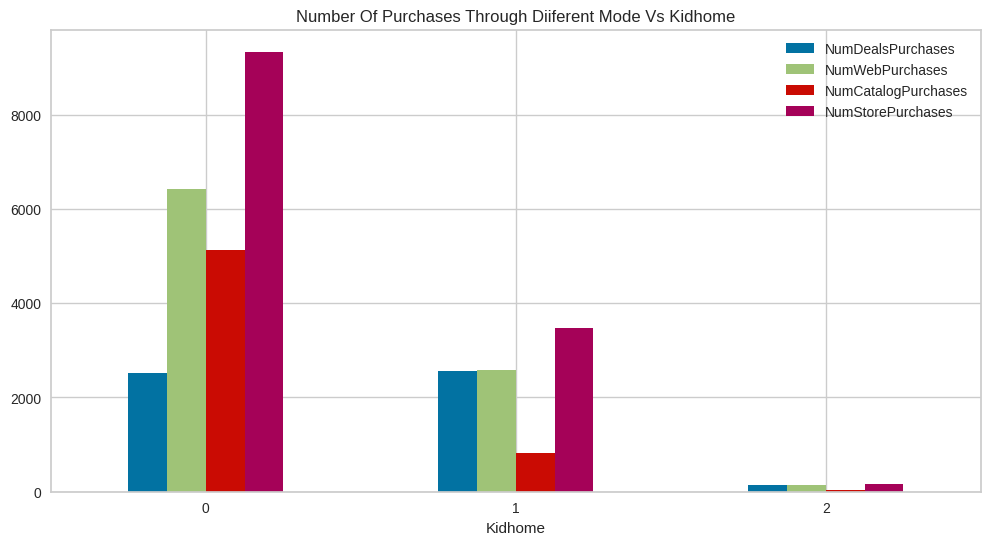

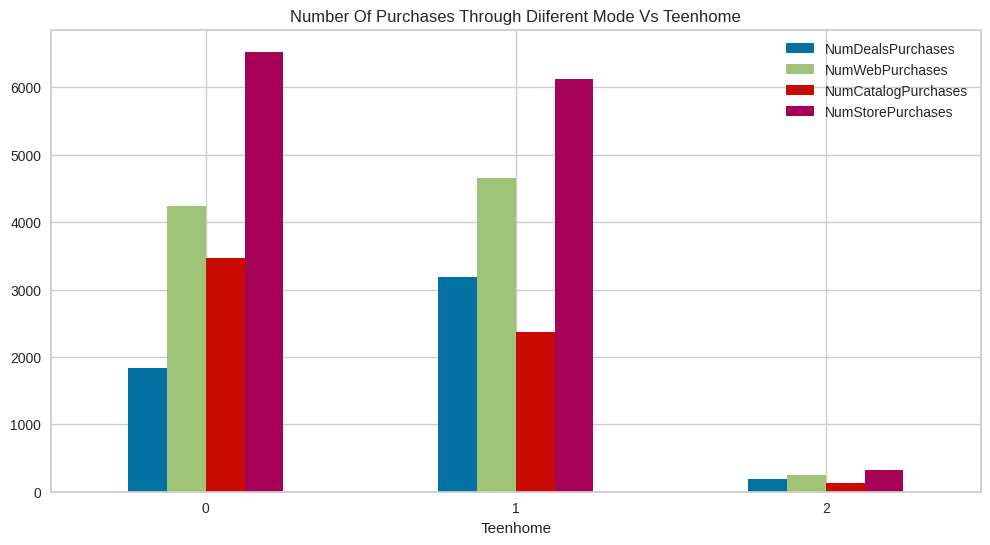

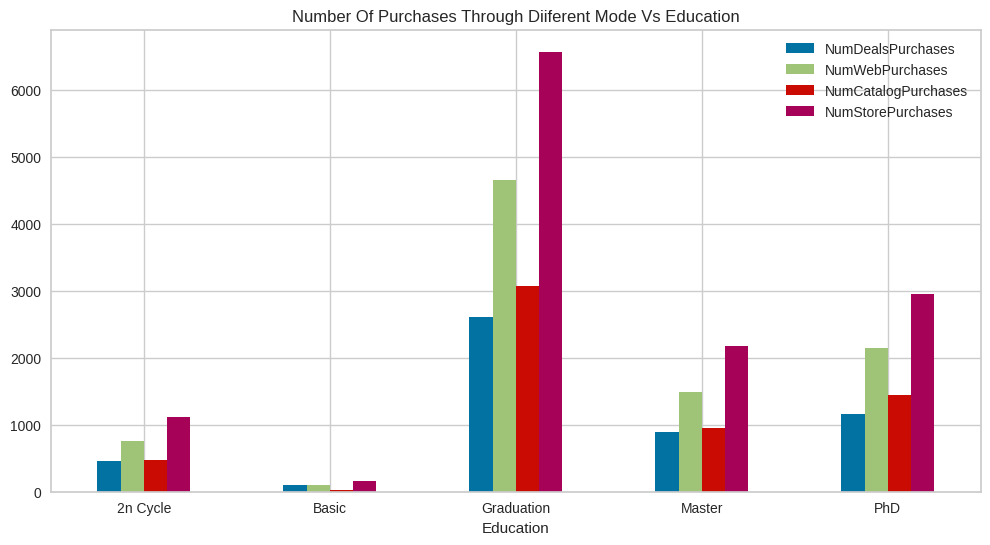

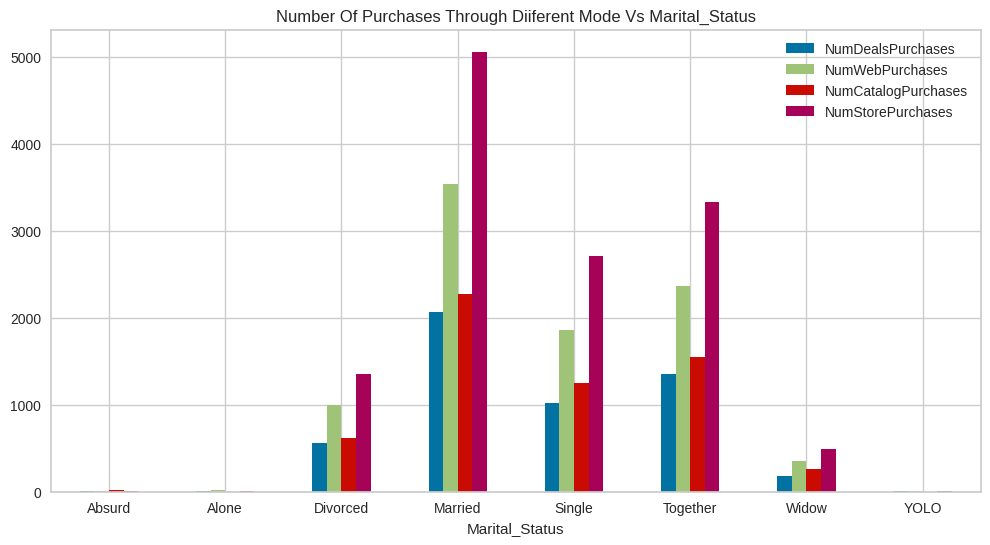

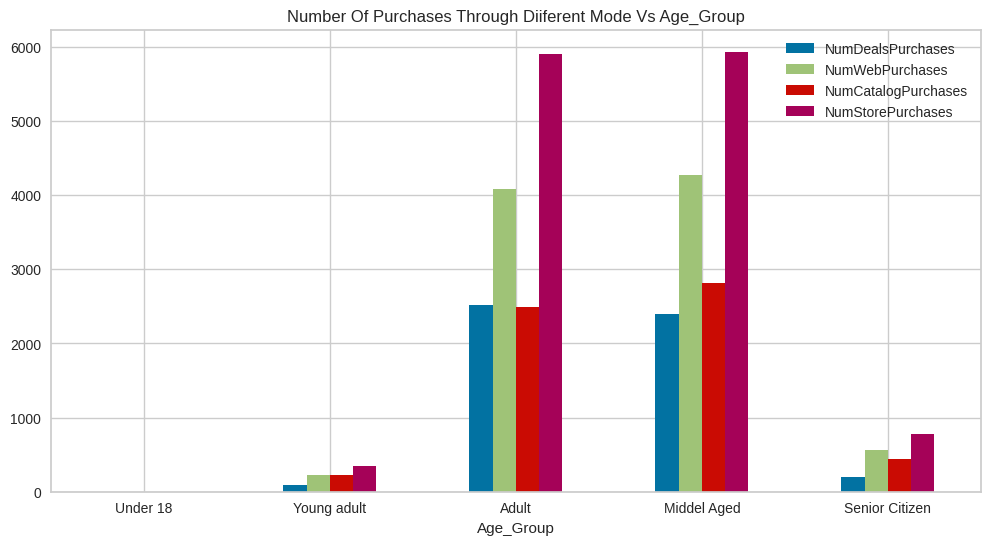

In [37]:
for col in ['Kidhome','Teenhome','Education','Marital_Status','Age_Group']:
    df.groupby(col)[['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].sum().plot(kind='bar',figsize = (12, 6))
    plt.title('Number Of Purchases Through Diiferent Mode Vs '+col)
    plt.xticks(rotation = 360)
    plt.show()

Horizontal Bar Plot

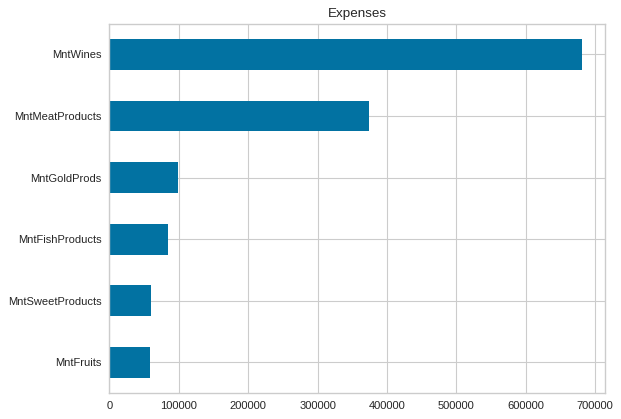

In [38]:
plt.figure(figsize = (8, 6), dpi = 80)
df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum().sort_values(ascending=True).plot(kind='barh')
plt.title('Expenses')
plt.show()

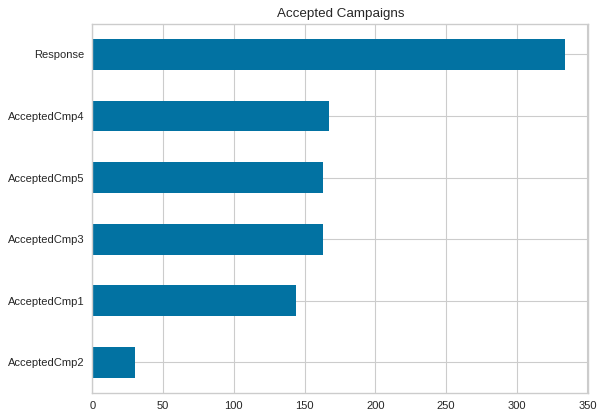

In [39]:
plt.figure(figsize = (8, 6), dpi = 80)
df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4','AcceptedCmp5', 'Response']].sum().sort_values(ascending=True).plot(kind='barh')
plt.title('Accepted Campaigns')
plt.show()

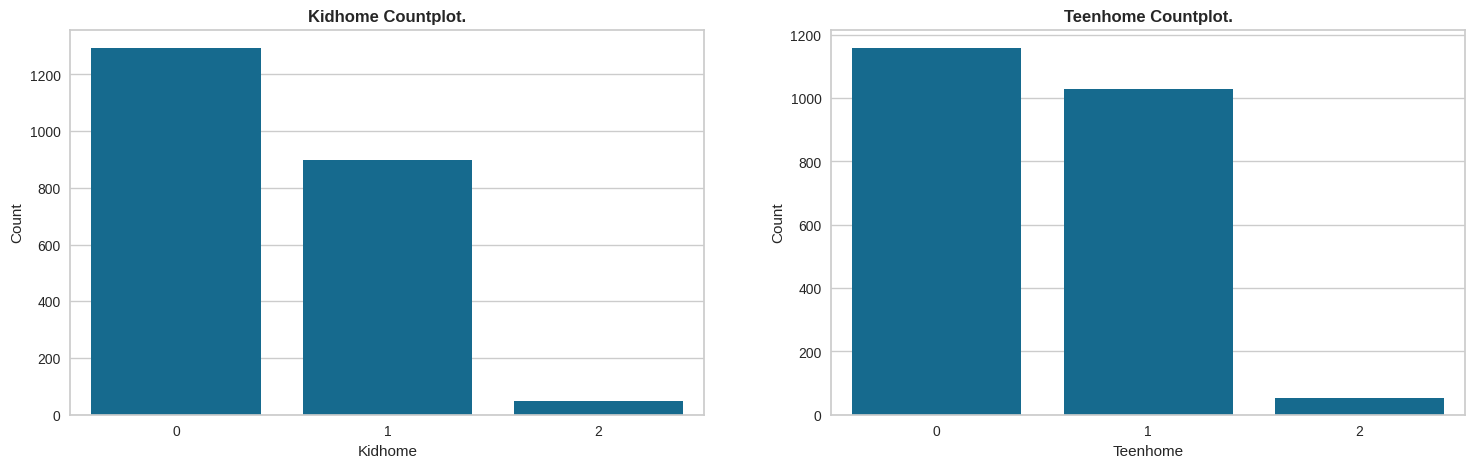

In [40]:
used_cols = ["Kidhome", "Teenhome"]
fig, ax = plt.subplots(1, 2, figsize = (18,5))

for i in range(2):
    sns.countplot(ax=ax[i], data=df, x=used_cols[i])
    ax[i].set_title(f"{used_cols[i]} Countplot.", weight="bold")
    ax[i].set_ylabel("Count")

plt.show()

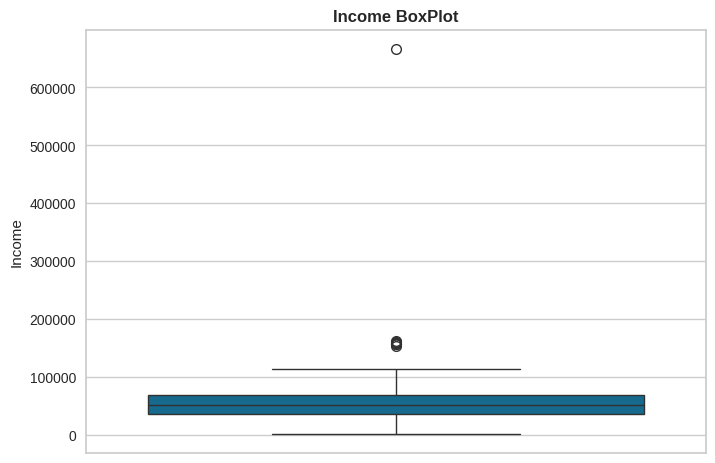

In [41]:
sns.boxplot(y="Income", data=df)
plt.title("Income BoxPlot", weight="bold")
plt.show()

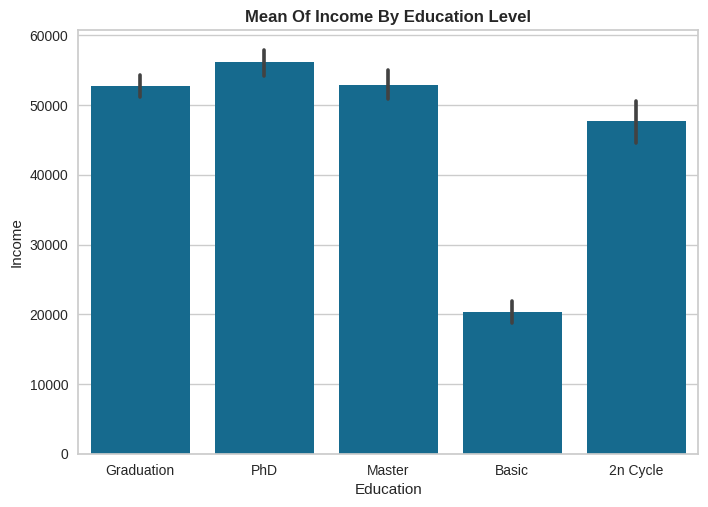

In [42]:
sns.barplot(x="Education", y="Income", data=df)
plt.title("mean of Income by Education level".title() , weight="bold")
plt.show()

In [43]:
df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','Response']].sample(5)
## Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
415,0,0,0,0,0,0
737,0,0,0,0,0,0
795,0,0,0,1,0,0
252,1,1,0,1,1,1
1852,0,0,0,0,0,0


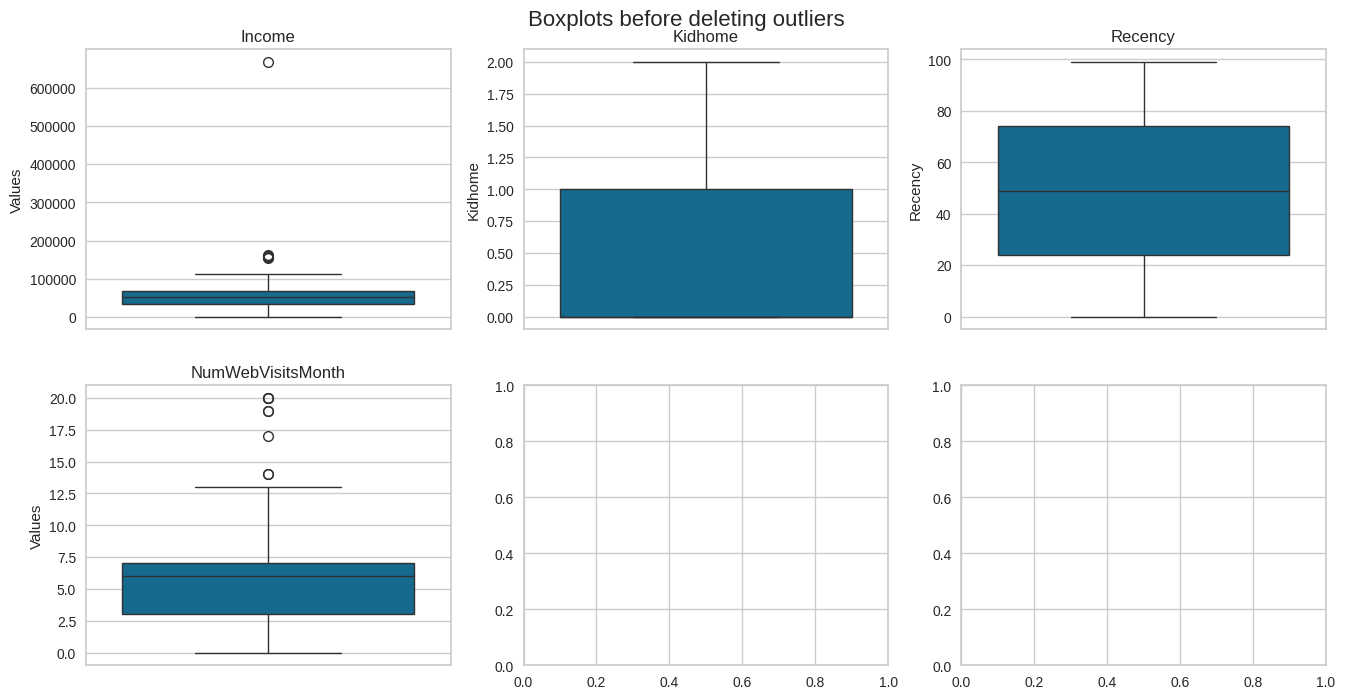

In [44]:
numeric_columns = ['Income',"Kidhome", "Recency","NumWebVisitsMonth"]

def boxplots_custom(dataset, columns_list, rows, cols, suptitle,size=(16,8)):
    fig, axs = plt.subplots(rows, cols,  figsize=size)
    fig.suptitle(suptitle,y=0.93, size=16)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        if i % cols == 0:
            axs[i].set_ylabel('Values')
        sns.boxplot( data=dataset[data], orient='v', ax=axs[i])
        axs[i].set_title(data)

boxplots_custom(dataset=df, columns_list=numeric_columns, rows=2, cols=3, suptitle='Boxplots before deleting outliers')

# Data Cleaning

Steps To Follow:

First of all I am going to fix the column names

I will convert the datetime column into correct format

Then I'll take care of the missing values

Examin the unique values within categorical columns

Check the timeline of the data since we have datetime columns given

In [45]:
df.rename(columns = {'MntGoldProds':'MntGoldProds'}, inplace = True)

In [46]:
# Check the skewness before imputation of numeric cols
df['Income'].skew()

6.799964754609881

If the skewness is between -0.5 and 0.5, the data are fairly symmetrical.

If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed.

If the skewness is less than -1 or greater than 1, the data are highly skewed.

In [47]:
# Replacing null values with median cause the data is skewed which means there are outliers in the data
df['Income'].fillna(df['Income'].median(), inplace = True)

In [48]:
# check the unique values
df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [49]:
# check the unique values
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [50]:
df.describe(include="number").T

,count,mean,std,min,25%,50%,75%,max
Income,2240.0,52247.251354,25037.797168,1730.0,35538.75,51741.5,68289.75,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0
MntSweetProducts,2240.0,27.062946,41.280498,0.0,1.00,8.0,33.00,263.0
MntGoldProds,2240.0,44.021875,52.167439,0.0,9.00,24.0,56.00,362.0


In [51]:
df.describe(include="O").T

,count,unique,top,freq
Education,2240,5,Graduation,1127
Marital_Status,2240,8,Married,864
Partner,2240,2,Yes,1444
Education_Level,2240,3,Graduate,1127
Month_Joined,2240,12,August,222
Day_Joined,2240,7,Monday,341


In [52]:
df1 = df.copy() # make a copy
df1.drop(['Education','Marital_Status','Partner','Education_Level','Month_Joined'], axis=1, inplace=True)

In [53]:
num_col = df1.select_dtypes(include = np.number).columns

In [54]:
for col in num_col:
    q1 = df1[col].quantile(0.25)
    q3 = df1[col].quantile(0.75)
    iqr = q3-q1
    ll = q1-(1.5*iqr)
    ul = q3+(1.5*iqr)
    for ind in df1[col].index:
        if df1.loc[ind,col]>ul:
            df1.loc[ind,col]=ul
        elif df1.loc[ind,col]<ll:
            df1.loc[ind,col]=ll
        else:
            pass
print("Outliers have been taken care of")

Outliers have been taken care of


# Model Building

In [55]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.metrics import davies_bouldin_score, silhouette_score
import warnings
warnings.filterwarnings("ignore")

In [56]:
df=pd.read_excel("/content/marketing_campaign.xlsx")

In [57]:
df.sample(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1576,2130,1982,Graduation,Together,45203.0,2,0,2014-03-23,4,35,3,67,10,8,24,1,3,1,3,6,0,0,0,0,0,0,3,11,1
735,7875,1949,Graduation,Married,72025.0,0,0,2014-04-29,46,967,0,617,43,50,0,1,4,8,13,2,0,1,1,1,0,0,3,11,1
1449,1927,1973,2n Cycle,Together,69401.0,0,1,2014-03-23,41,399,27,159,58,8,39,4,4,4,5,2,0,0,0,0,0,0,3,11,0


In [58]:
df.shape

(2240, 29)

In [59]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [61]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [62]:
df.shape

(2240, 29)

In [63]:
#Checking for duplicate records.
df.duplicated().sum()

0

Feature Engineering¶

In [64]:
#Adding age column
df["Age"] = 2023 - df["Year_Birth"]

In [65]:
df["Education"].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [66]:
df["Marital_Status"].value_counts(normalize=True)

Married     0.385714
Together    0.258929
Single      0.214286
Divorced    0.103571
Widow       0.034375
Alone       0.001339
Absurd      0.000893
YOLO        0.000893
Name: Marital_Status, dtype: float64

In [67]:
df["Z_CostContact"].value_counts()

3    2240
Name: Z_CostContact, dtype: int64

In [68]:
df["Z_Revenue"].value_counts()

11    2240
Name: Z_Revenue, dtype: int64

In [69]:
#Dropping the column which are not required.
df=df.drop(["Z_CostContact","Z_Revenue","Year_Birth","ID","Dt_Customer"],axis=1)

In [70]:
# simplifying Education field.
df["Education"] = df["Education"].replace({"Graduation":"Graduate","PhD":"Post-Graduate","Master":"Post-Graduate","2n Cycle":"Graduate","Basic":"Under Graduate",})

In [71]:
# simplifying Marital Status field.
df["Marital_Status"] = df["Marital_Status"].replace({"Married": "Partner", "Together": "Partner", "Absurd": "Single", "Widow": "Single", "YOLO": "Single", "Divorced": "Single", "Single": "Single","Alone":"Single"})

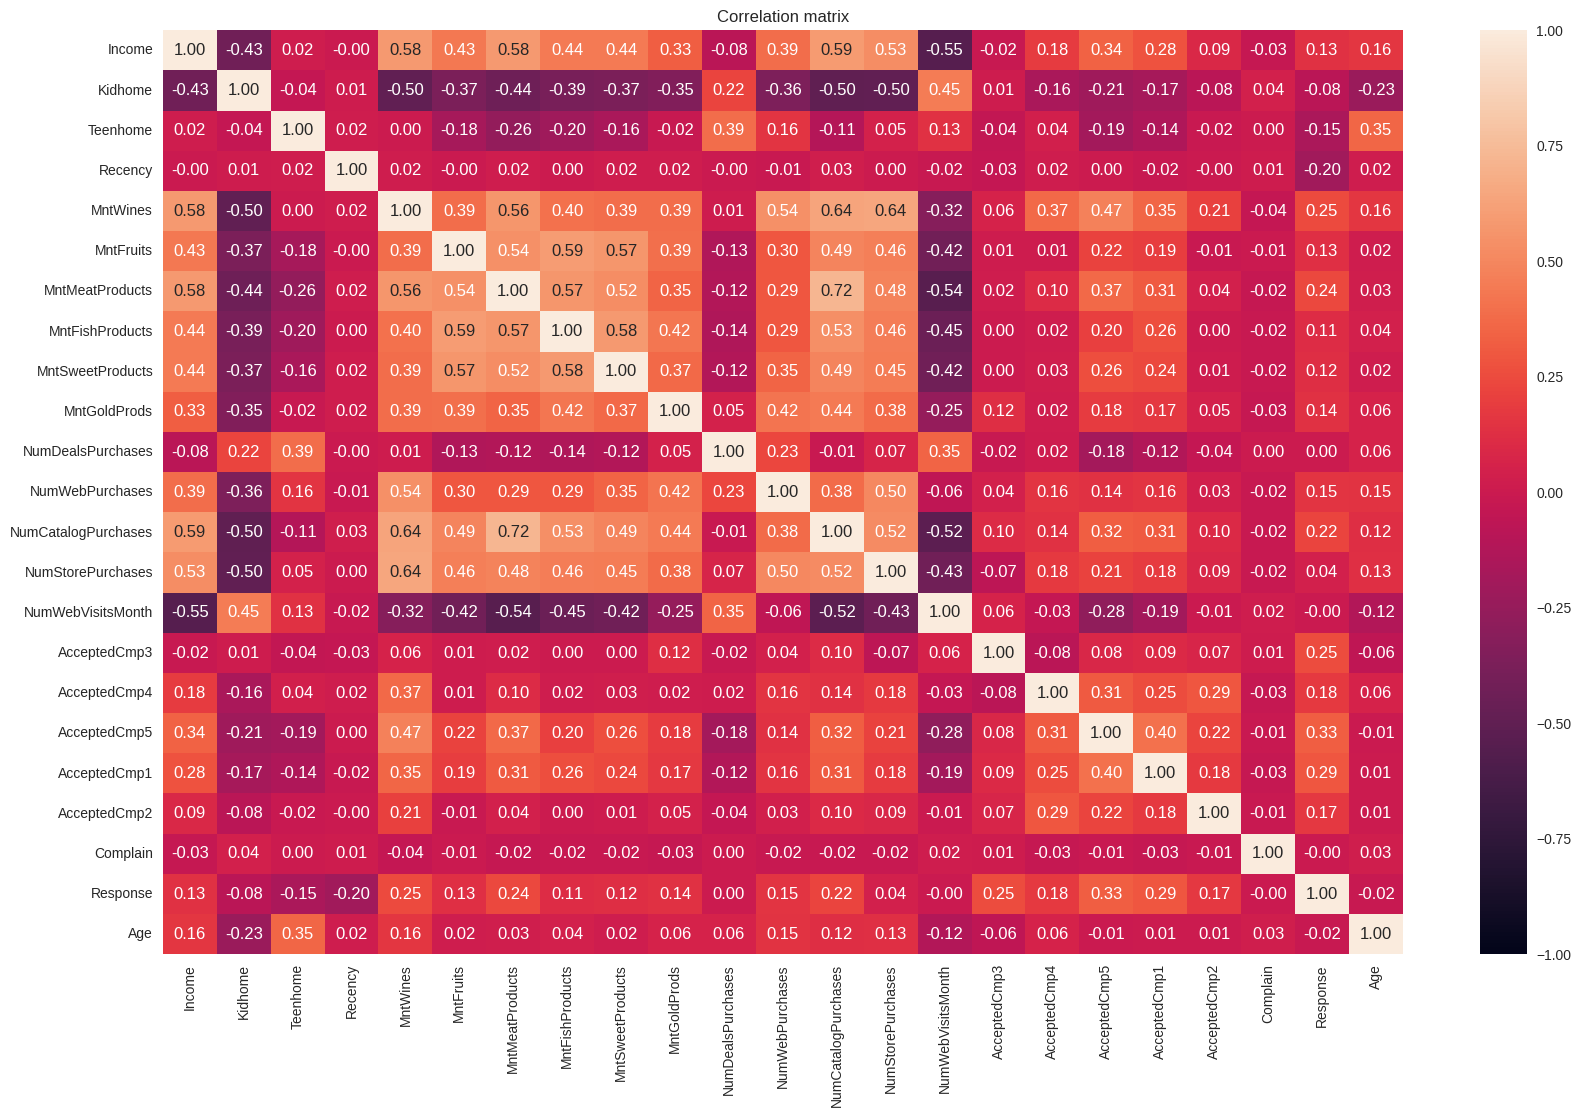

In [72]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(), annot=True, annot_kws={"fontsize":12}, fmt=".2f", vmin=-1)
plt.title("Correlation matrix")
plt.show()

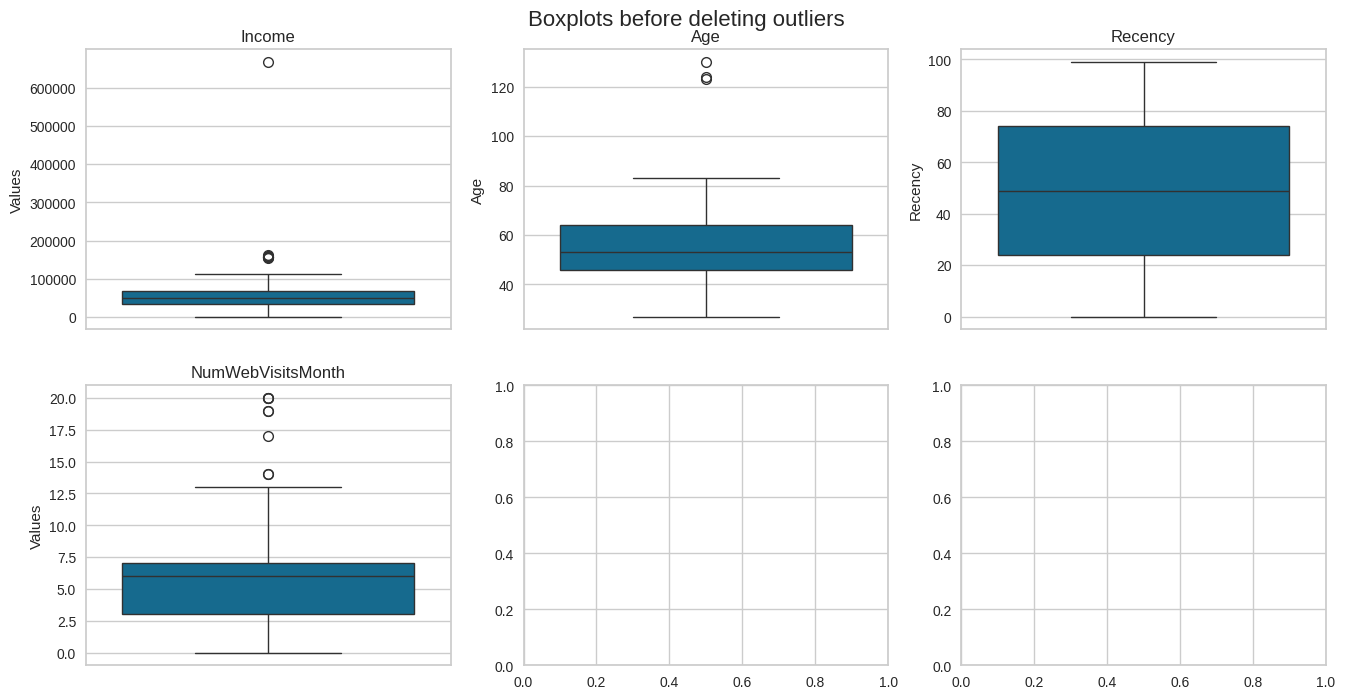

In [73]:
numeric_columns = ['Income',"Age", "Recency","NumWebVisitsMonth"]

def boxplots_custom(dataset, columns_list, rows, cols, suptitle,size=(16,8)):
    fig, axs = plt.subplots(rows, cols,  figsize=size)
    fig.suptitle(suptitle,y=0.93, size=16)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        if i % cols == 0:
            axs[i].set_ylabel('Values')
        sns.boxplot( data=dataset[data], orient='v', ax=axs[i])
        axs[i].set_title(data)

boxplots_custom(dataset=df, columns_list=numeric_columns, rows=2, cols=3, suptitle='Boxplots before deleting outliers')

#Income

In [74]:
fig_income = px.histogram(df, x="Income",range_x=[0,200000],title="Income Distribution")
fig_income.show()

Inference: We can see the outliers. Data is slightly skewed.

In [75]:
#Skewness of "Income" Disrribution
print("Skewness: ",np.round(df["Income"].skew(),2))

Skewness:  6.76


In [76]:
#Deleting outliers from income column
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1
outlier = df[(df['Income'] < (Q1 - 1.5 * IQR)) | (df['Income'] > (Q3 + 1.5 * IQR))]
print("No. of outliers detected and deleted in income :", len(outlier))
df = df[~((df['Income'] < (Q1 - 1.5 * IQR)) | (df['Income'] > (Q3 + 1.5 * IQR)))]

No. of outliers detected and deleted in income : 8


In [77]:
#Imputing mean to the income column
df['Income'].fillna(df["Income"].mean(),inplace=True)

Checking Age column

In [78]:
fig_income = px.histogram(df, x="Age",title="Age Distribution")
fig_income.show()

In [79]:
#Skewness of "Age" Disrribution
print("Skewness: ",np.round(df["Age"].skew(),2))

Skewness:  0.35


In [80]:
#Deleting outliers from Age column
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
outlier = df[(df['Age'] < (Q1 - 1.5 * IQR)) | (df['Age'] > (Q3 + 1.5 * IQR))]
print("No. of outliers detected and deleted in Age :", len(outlier))
df = df[~((df['Age'] < (Q1 - 1.5 * IQR)) | (df['Age'] > (Q3 + 1.5 * IQR)))]

No. of outliers detected and deleted in Age : 3


In [81]:
# Creating bins of different age group
bin_edges = [25,40,60,100]
bin_labels = ["20-40", '40-60', '60+']
df['Age_group'] = pd.cut(df['Age'], bins=bin_edges, labels=bin_labels)
df.drop("Age",axis=1,inplace=True)

In [82]:
fig_mar = px.histogram(df, x='Age_group', nbins=4, title="Age group")
fig_mar.show()

In [83]:
fig_mar = px.histogram(df, x='Marital_Status', nbins=4, title="Marital Status Distribution")
fig_mar.show()

In [84]:
web=df["NumWebPurchases"].sum()
catalogue=df["NumCatalogPurchases"].sum()
store=df["NumStorePurchases"].sum()

In [85]:
values = [web,catalogue,store]  # values in percentage
labels=["web_Purchase","Catalogue_purchase","Store_Purchase"]
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.show()

In [86]:
df["Complain"].value_counts()

0    2209
1      20
Name: Complain, dtype: int64

Since the no. of people with complain are nearly 1% of total data. Hence dropping the same.

In [87]:
df.drop("Complain", axis=1,inplace=True)

In [88]:
#Deleting outliers from Age column
Q1 = df["NumWebVisitsMonth"].quantile(0.25)
Q3 = df["NumWebVisitsMonth"].quantile(0.75)
IQR = Q3 - Q1
outlier = df[(df["NumWebVisitsMonth"] < (Q1 - 1.5 * IQR)) | (df["NumWebVisitsMonth"] > (Q3 + 1.5 * IQR))]
print("No. of outliers detected and deleted in Age :", len(outlier))
df = df[~((df["NumWebVisitsMonth"] < (Q1 - 1.5 * IQR)) | (df["NumWebVisitsMonth"] > (Q3 + 1.5 * IQR)))]

No. of outliers detected and deleted in Age : 8


### Plots to understand response rate of customers based other factors

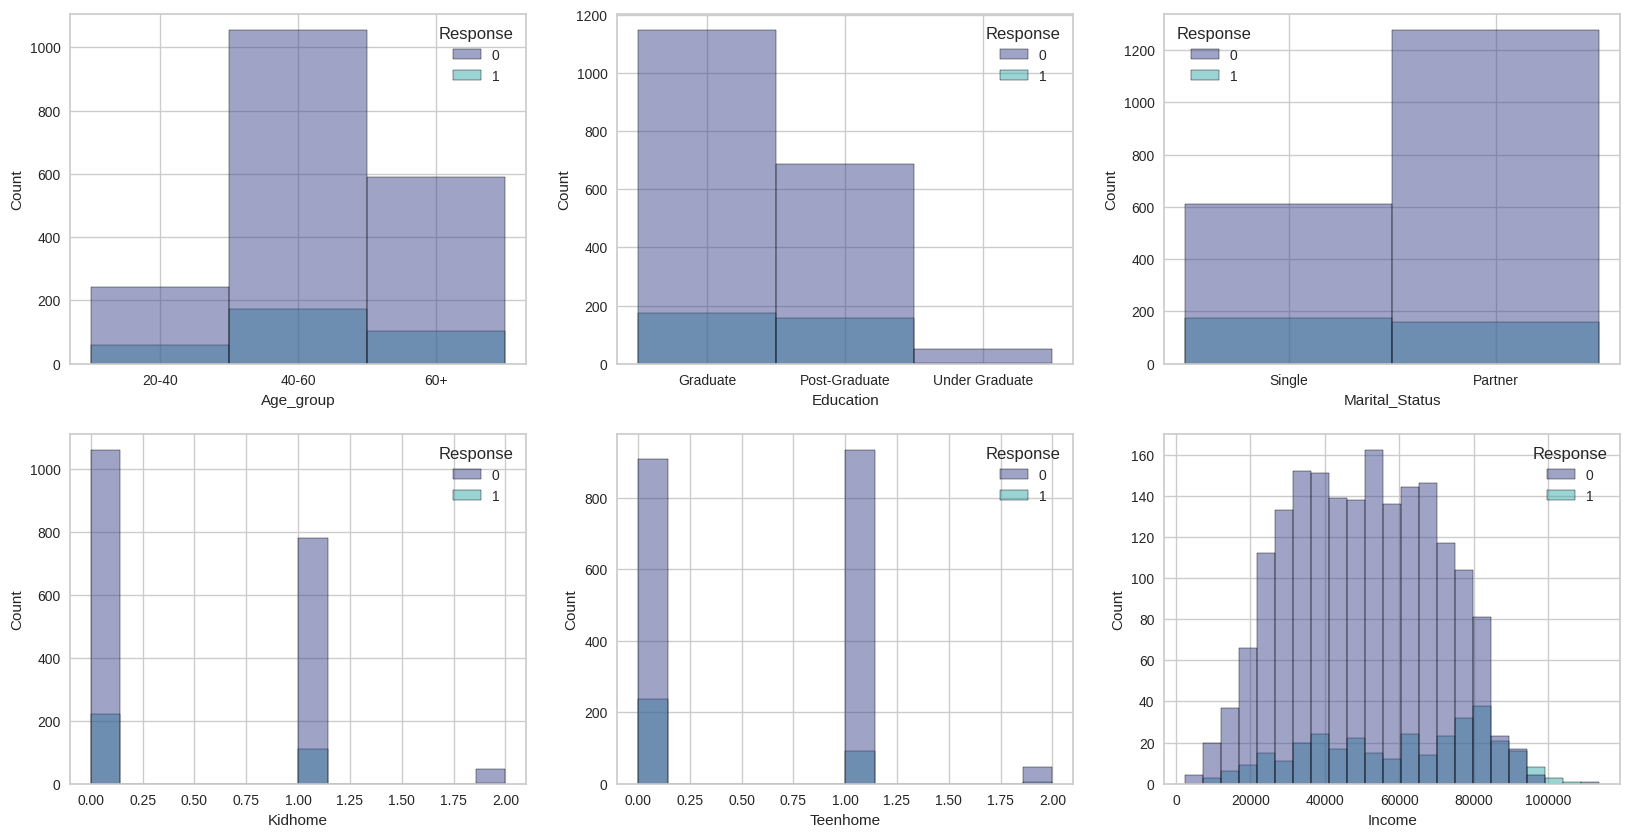

In [89]:
# Plotting "Response" with other fields
column_df=df[["Age_group","Education","Marital_Status","Kidhome","Teenhome","Income","Response"]]
plt.figure(figsize=(20, 10));
ax1 = plt.subplot(2,3,1);
ax2 = plt.subplot(2,3,2);
ax3 = plt.subplot(2,3,3);
ax4 = plt.subplot(2,3,4);
ax5 = plt.subplot(2,3,5);
ax6 = plt.subplot(2,3,6);
axes = [ax1,ax2,ax3,ax4,ax5,ax6]
cols = column_df.columns
a = 0

for i in cols[0:6]:
  sns.histplot(data = column_df, x = i, hue = 'Response', ax = axes[a],
               palette = 'mako')
  a= a+1

Insight:
Graduate people has a higher acceptance rate of offer.
Acceptance rate of People with higher income is more

###Plots to understand the spending pattern of customers

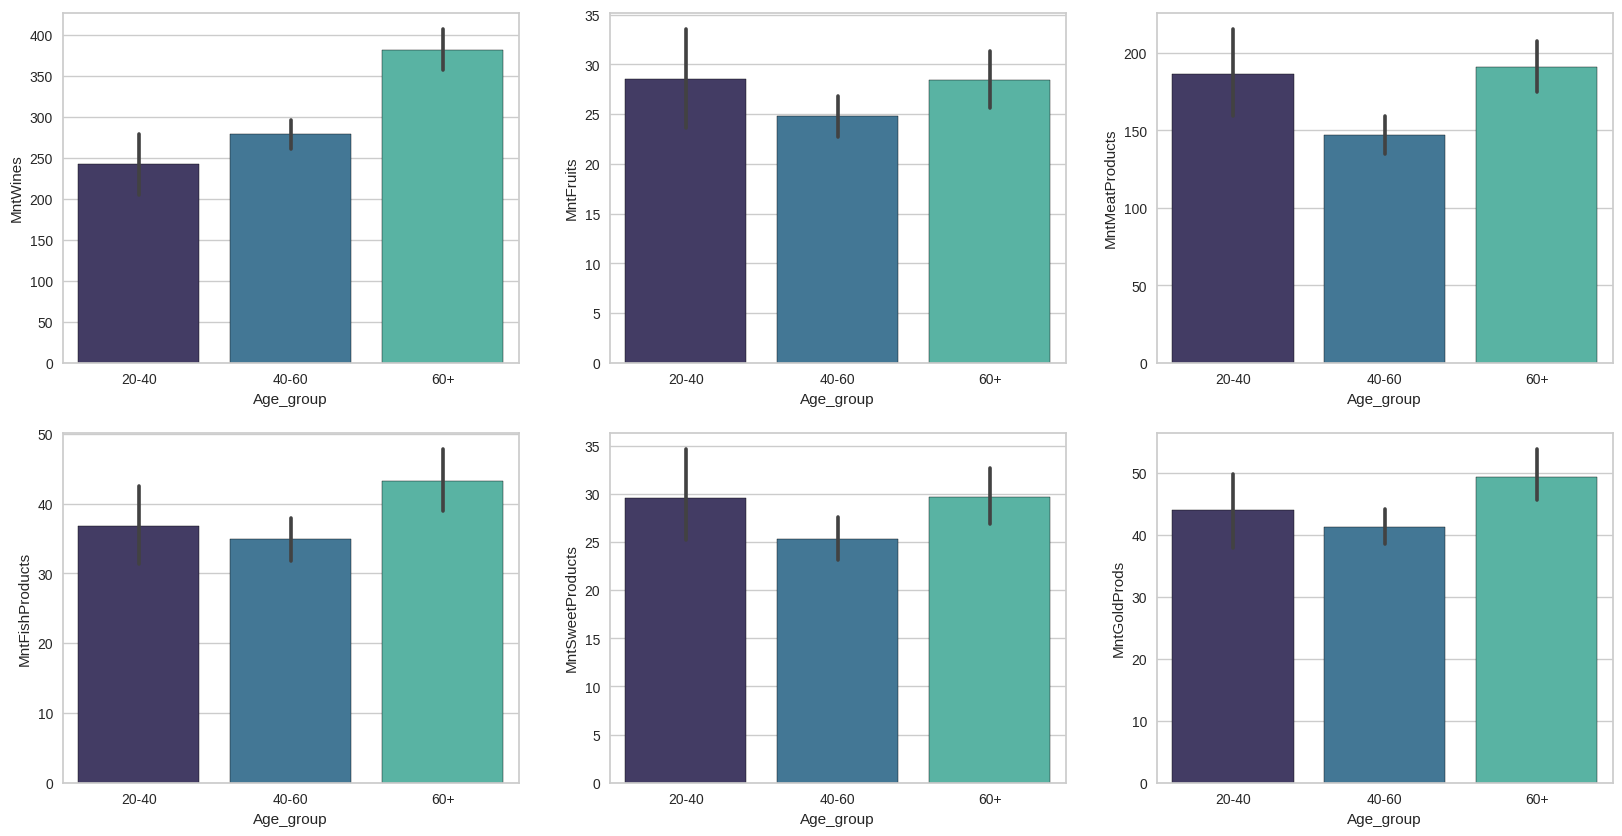

In [90]:
column_df2=df[["MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds","Age_group"]]
plt.figure(figsize=(20, 10));
ax1 = plt.subplot(2,3,1);
ax2 = plt.subplot(2,3,2);
ax3 = plt.subplot(2,3,3);
ax4 = plt.subplot(2,3,4);
ax5 = plt.subplot(2,3,5);
ax6 = plt.subplot(2,3,6);
axes = [ax1,ax2,ax3,ax4,ax5,ax6]
cols = column_df2.columns
a = 0

for i in cols[0:6]:
  sns.barplot(data = column_df2, x = "Age_group",y=i, ax = axes[a],
               palette = 'mako',edgecolor='black')
  a= a+1

From the plot it is evident that the spending pattern is similar in amount spent on wines,meat,fish,sweet,fruit and gold. people aged between 25-35 i.e young people spend the most. Hence we can add all the column to arrive at total amount spent and drop the individual features.

In [91]:
df["Total_amt_spent"]=df["MntWines"]+df["MntFruits"]+df["MntMeatProducts"]+df["MntFishProducts"]+df["MntSweetProducts"]+df["MntGoldProds"]
df.drop(["MntWines","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds","MntFruits"],axis=1,inplace=True)

<Axes: xlabel='Total_amt_spent'>

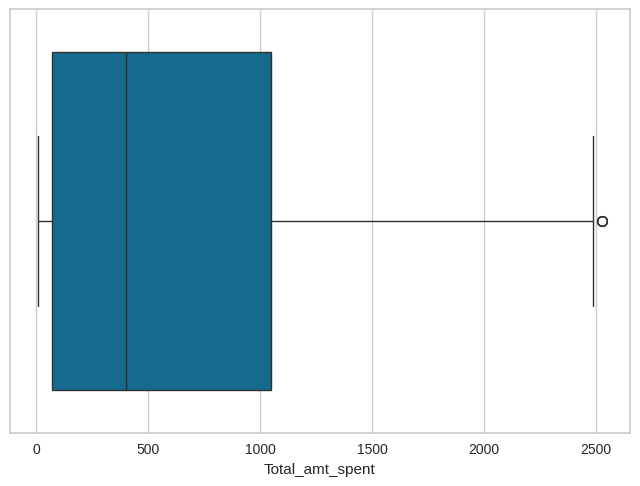

In [92]:
sns.boxplot(data=df,x="Total_amt_spent")

In [93]:
#Dropping outliers in from total spent
Q1 = df["Total_amt_spent"].quantile(0.25)
Q3 = df["Total_amt_spent"].quantile(0.75)
IQR = Q3 - Q1
outlier = df[(df["Total_amt_spent"] < (Q1 - 1.5 * IQR)) | (df["Total_amt_spent"] > (Q3 + 1.5 * IQR))]
print("No. of outliers detected and deleted in income :", len(outlier))
df = df[~((df["Total_amt_spent"] < (Q1 - 1.5 * IQR)) | (df["Total_amt_spent"] > (Q3 + 1.5 * IQR)))]

No. of outliers detected and deleted in income : 3


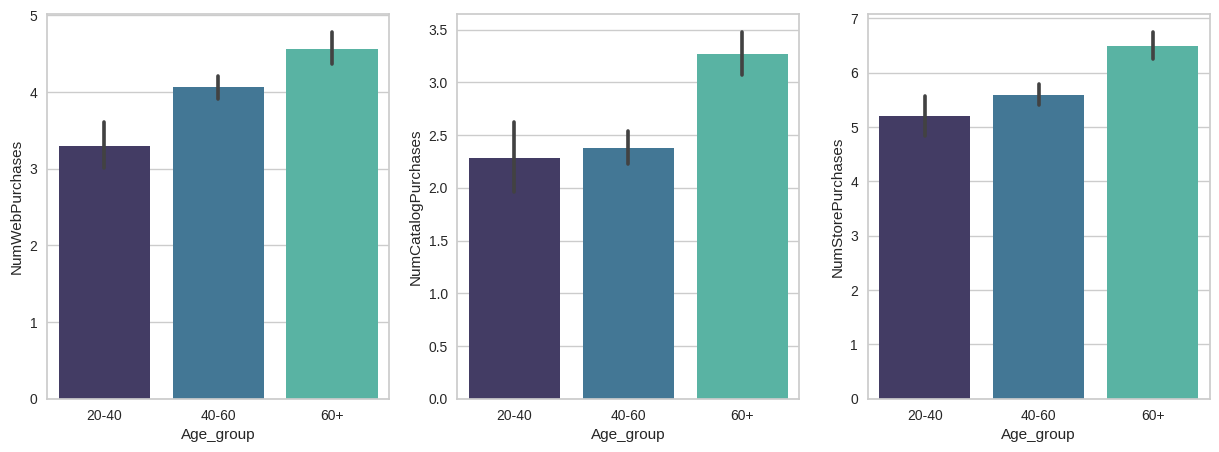

In [94]:
# Underastanding the type of purchase made
type_of_shop=["NumWebPurchases","NumCatalogPurchases","NumStorePurchases"]
plt.figure(figsize=(15,5));
ax1 = plt.subplot(1,3,1);
ax2 = plt.subplot(1,3,2);
ax3 = plt.subplot(1,3,3);
axes = [ax1,ax2,ax3]
cols = column_df2.columns
a=0
for i in type_of_shop:
  sns.barplot(df, x = "Age_group",y=i,ax = axes[a], palette = 'mako')
  a=a+1

Customers aged 50-65 are more highest web purchasers

In [95]:
df['AcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']
df.drop(['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5'],axis=1,inplace=True)

In [96]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Age_group', 'Total_amt_spent', 'AcceptedCmp'],
      dtype='object')

In [97]:
df.shape

(2218, 15)

In [98]:
df_cluster=df.copy()
df_cluster2=df.copy()

In [99]:
df_cluster.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Age_group,Total_amt_spent,AcceptedCmp
0,Graduate,Single,58138.0,0,0,58,3,8,10,4,7,1,60+,1617,0
1,Graduate,Single,46344.0,1,1,38,2,1,1,2,5,0,60+,27,0
2,Graduate,Partner,71613.0,0,0,26,1,8,2,10,4,0,40-60,776,0
3,Graduate,Partner,26646.0,1,0,26,2,2,0,4,6,0,20-40,53,0
4,Post-Graduate,Partner,58293.0,1,0,94,5,5,3,6,5,0,40-60,422,0


In [100]:
print("Percentage of records deleted while cleaning",np.round((2240-df.shape[0])/2240*100,2))

Percentage of records deleted while cleaning 0.98


In [101]:
#Converting categorical features into numerical features by using OHE
df=pd.get_dummies(df)

In [102]:
df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Response', 'Total_amt_spent', 'AcceptedCmp',
       'Education_Graduate', 'Education_Post-Graduate',
       'Education_Under Graduate', 'Marital_Status_Partner',
       'Marital_Status_Single', 'Age_group_20-40', 'Age_group_40-60',
       'Age_group_60+'],
      dtype='object')

In [103]:
df.shape

(2218, 20)

Initially building model considering most important features and then comparing it with model comprising all features.

In [104]:
df1=df[['Income','Total_amt_spent', 'AcceptedCmp','Marital_Status_Single','Marital_Status_Partner','Age_group_20-40',
       'Age_group_40-60', 'Age_group_60+']]

In [105]:
#Standardization of the data
scaler = StandardScaler()
scaled_df1 = scaler.fit_transform(df1)

In [106]:
scaled_df1

array([[ 0.31355967,  1.69434911, -0.43888101, ..., -0.39320094,
        -1.11373428,  1.48343426],
       [-0.26430866, -0.96715435, -0.43888101, ..., -0.39320094,
        -1.11373428,  1.48343426],
       [ 0.97379164,  0.28659791, -0.43888101, ..., -0.39320094,
         0.89788024, -0.67411144],
       ...,
       [ 0.25687037,  1.06496213,  1.03602518, ..., -0.39320094,
         0.89788024, -0.67411144],
       [ 0.8577672 ,  0.39874931, -0.43888101, ..., -0.39320094,
        -1.11373428,  1.48343426],
       [ 0.0553955 , -0.72443863, -0.43888101, ..., -0.39320094,
        -1.11373428,  1.48343426]])

In [107]:
# Applying PCA
pca1 = PCA(n_components = 3)
pca_values1 = pca1.fit_transform(scaled_df1)

In [108]:
pca_values1

array([[ 2.10736667,  1.64873363, -0.78312323],
       [ 0.30575059,  2.02352935, -1.60272887],
       [-0.13564214, -1.19131698,  1.15268581],
       ...,
       [ 0.96081747,  1.55718167,  1.86838873],
       [ 1.1976246 , -1.15437638, -1.35046169],
       [ 0.1273518 , -0.92936454, -1.82792046]])

In [109]:
#Calculating cumulative variance
var1 = pca1.explained_variance_ratio_
var_Cum1 = np.cumsum(np.round(var1,decimals = 4)*100)
var_Cum1

array([28.52, 53.53, 74.27])

In [110]:
pca_values1 = pd.DataFrame(data = pca_values1, columns=['PC1', 'PC2', 'PC3'])


In [111]:
#Function to visualize the PCA points on 3 dimensions
def visualize_clustering(data, predictions=None, marker_size=3, title="Principal Components in 3-Dimensions"):
  if predictions is not None:
    data['preds'] = predictions
    fig = px.scatter_3d(data, x='PC1', y='PC2', z='PC3', color='preds',
                      color_discrete_sequence=px.colors.qualitative.Pastel, opacity=0.5)
  else:
    fig = px.scatter_3d(data, x='PC1', y='PC2', z='PC3',
                        color_discrete_sequence=px.colors.qualitative.Pastel, opacity=0.5)

  fig.update_traces(marker_size = marker_size)
  fig.update_layout(title_text=title, title_x=0.5)
  fig.show()

In [112]:
visualize_clustering(pca_values1)

In [113]:
#Used for evaluation
db1 = []
sil1 = []

# K-Means Clustering

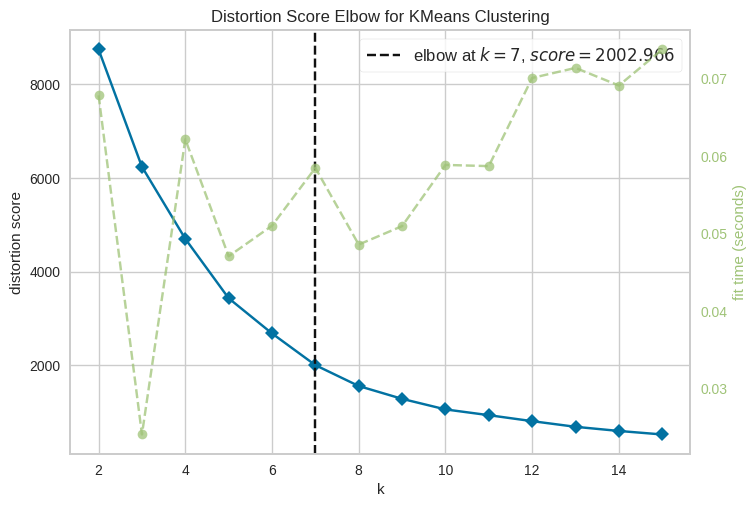

In [114]:
#Plotting Distortion score to find optimum value of K
visualizer = KElbowVisualizer(KMeans(), k=15);

visualizer.fit(pca_values1);
visualizer.show();

In [115]:
model_kmeans1 = KMeans(n_clusters=6, random_state=0, init='k-means++')
y_predict_kmeans1 = model_kmeans1.fit_predict(pca_values1)

In [116]:
visualize_clustering(pca_values1, model_kmeans1.labels_, title="KMeans Clustering K=6")

In [117]:
db1.append(davies_bouldin_score(pca_values1, model_kmeans1.labels_))
sil1.append(silhouette_score(pca_values1, model_kmeans1.labels_))

Applying DBSCAN

In [118]:
dbscan1 = DBSCAN(eps=2, min_samples=3)
dbscan1.fit_predict(pca_values1)

array([0, 0, 1, ..., 4, 5, 2])

In [119]:
cl1=pd.DataFrame(dbscan1.labels_,columns=['cluster'])
cl1

,cluster
0,0
1,0
2,1
3,2
4,3
...,...
2213,1
2214,5
2215,4
2216,5


In [120]:
cl1["cluster"].value_counts()

3    551
4    417
2    361
0    357
1    260
5    260
6     12
Name: cluster, dtype: int64

Since we have deleted all outliers, no noise detected in DBSCAN clustering

In [121]:
#Visualizing clusters formed in DBSCAN
visualize_clustering(pca_values1,dbscan1.labels_, title="DBSCAN")

In [122]:
db1.append(davies_bouldin_score(pca_values1, dbscan1.labels_))
sil1.append(silhouette_score(pca_values1,dbscan1.labels_))

Agglomerative clustering

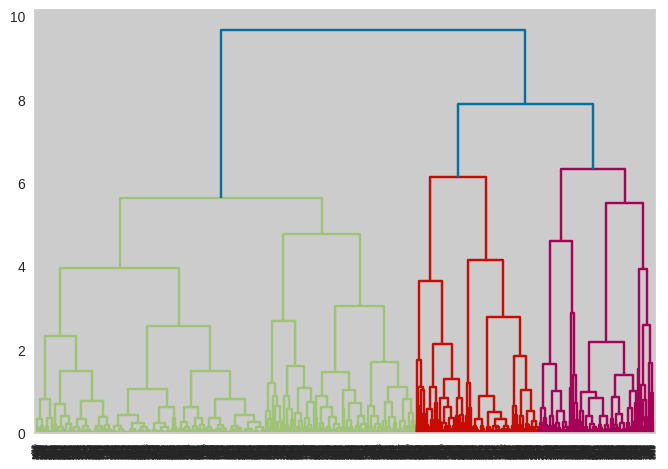

In [123]:
dendrogram1 = sch.dendrogram(sch.linkage(pca_values1, method='complete'))

In [124]:
hc1 = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'complete')

In [125]:
y_hc1 = hc1.fit_predict(pca_values1)

In [126]:
df_agglo1=df1.copy()
df_agglo1['h_clusterid'] = y_hc1
df_agglo1['h_clusterid'].value_counts()

0    1364
2     272
3     260
4     178
1     144
Name: h_clusterid, dtype: int64

In [127]:
db1.append(davies_bouldin_score(pca_values1, hc1.labels_))
sil1.append(silhouette_score(pca_values1, hc1.labels_))

In [128]:
res1 = pd.DataFrame({'Davies Bouldin Index (Lower is better)': db1, 'Silhouette Index (Higher is better)': sil1}, index=['KMeans', 'DBSCAN', 'Agglomerative'])
res1.index.names = ['Algorithm']
res1

,Davies Bouldin Index (Lower is better),Silhouette Index (Higher is better)
Algorithm,,
KMeans,0.578061,0.661690
DBSCAN,0.483635,0.653040
Agglomerative,0.834243,0.317802


Here we can clearly see that K-Means is performing better than other 2 models

Cluster exploration

No. of customers in each cluster

In [129]:
df_cluster['Cluster']=model_kmeans1.labels_
df['Cluster']=model_kmeans1.labels_

In [130]:
#Writing clusters into a excel file
with pd.ExcelWriter('my_excel_file.xlsx') as writer:
    df_cluster.to_excel(writer, sheet_name='Sheet1', index=False)

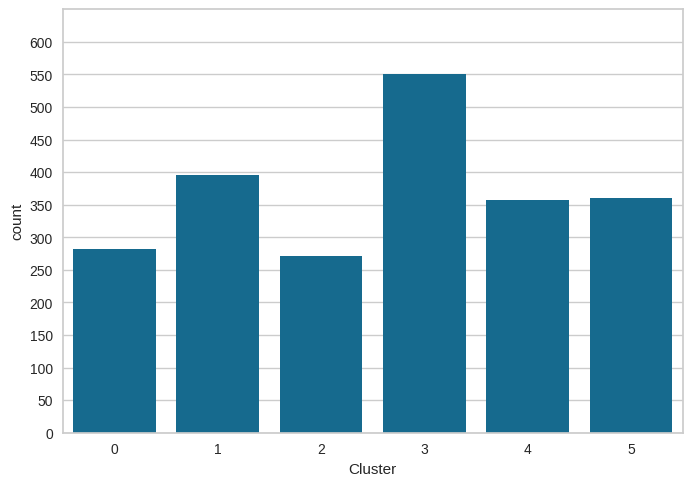

In [131]:
sns.countplot(data=df, x='Cluster');
plt.yticks(list(range(0,650, 50)));
plt.ylim([0,650]);

In [132]:
amount = df.groupby('Cluster').Income.mean()
fig = px.pie(values=np.round(amount.values, 2), names=amount.index,
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.data[0].textinfo = 'percent+value'
fig.update_layout(title_text='Average Income Per Group', title_x=0.5)

Cluster 4 has people with higher income whereas cluster 5 has people with lower income

In [133]:
pca_values1.drop('preds',axis=1,inplace=True)

In [134]:
pca_values1

,PC1,PC2,PC3
0,2.107367,1.648734,-0.783123
1,0.305751,2.023529,-1.602729
2,-0.135642,-1.191317,1.152686
3,-1.474042,-0.432292,-1.853976
4,-0.827564,-1.045161,0.846766
...,...,...,...
2213,0.108054,-1.238995,1.275623
2214,1.254126,-1.181684,-1.260476
2215,0.960817,1.557182,1.868389
2216,1.197625,-1.154376,-1.350462


In [135]:
df_cluster2["clusters"]=model_kmeans1.labels_

Now building model with 4 no's of clusters

In [136]:
model_kmeans2 = KMeans(n_clusters=4, random_state=0, init='k-means++')
y_predict_kmeans2 = model_kmeans2.fit(df1)

In [137]:

df_cluster2["clusters"]=model_kmeans1.labels_
df_cluster2["clusters"]=model_kmeans2.labels_

In [138]:
print(model_kmeans2.labels_)

[2 1 0 ... 2 0 2]


In [139]:
check=pd.DataFrame(model_kmeans2.labels_)
check

,0
0,2
1,1
2,0
3,3
4,2
...,...
2213,2
2214,2
2215,2
2216,0


In [140]:
model_kmeans2.cluster_centers_

array([[7.86270620e+04, 1.36199812e+03, 7.59398496e-01, 3.62781955e-01,
        6.37218045e-01, 1.39097744e-01, 4.73684211e-01, 3.87218045e-01],
       [4.08297484e+04, 2.02891234e+02, 1.29870130e-01, 3.71753247e-01,
        6.28246753e-01, 1.16883117e-01, 6.21753247e-01, 2.61363636e-01],
       [5.92731503e+04, 7.25705047e+02, 2.27129338e-01, 3.35962145e-01,
        6.64037855e-01, 5.52050473e-02, 5.31545741e-01, 4.13249211e-01],
       [2.33850573e+04, 7.28233945e+01, 7.33944954e-02, 3.46330275e-01,
        6.53669725e-01, 2.66055046e-01, 5.87155963e-01, 1.46788991e-01]])

In [141]:
centroid_df = pd.DataFrame(model_kmeans2.cluster_centers_, columns=['Income','Total_amt_spent', 'AcceptedCmp','Marital_Status_Single','Marital_Status_Partner','Age_group_20-40',
       'Age_group_40-60', 'Age_group_60+'])

In [142]:
#Writing clusters into a excel file
with pd.ExcelWriter('centroid.xlsx') as writer:
    centroid_df.to_excel(writer, sheet_name='Sheet1', index=False)

In [143]:
#Writing clusters into a excel file
with pd.ExcelWriter('my_excel_file_rev.xlsx') as writer:
    df_cluster2.to_excel(writer, sheet_name='Sheet1', index=False)

MODEL BUILDING WITH ALL THE FEATURES LEFT AFTER DATA CLEANING

In [144]:
#Standardization of the data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

In [145]:
scaled_df

array([[ 0.31355967, -0.82673685, -0.93347806, ..., -1.11373428,
         1.48343426,  0.84364639],
       [-0.26430866,  1.02923717,  0.90203111, ..., -1.11373428,
         1.48343426,  0.84364639],
       [ 0.97379164, -0.82673685, -0.93347806, ...,  0.89788024,
        -0.67411144, -1.61281267],
       ...,
       [ 0.25687037, -0.82673685, -0.93347806, ...,  0.89788024,
        -0.67411144, -0.9986979 ],
       [ 0.8577672 , -0.82673685,  0.90203111, ..., -1.11373428,
         1.48343426, -0.38458314],
       [ 0.0553955 ,  1.02923717,  0.90203111, ..., -1.11373428,
         1.48343426,  1.45776115]])

In [146]:
# Applying PCA
pca = PCA(n_components = 12) #Restricted to 12 since there is no much increase in variance from there on.
pca_values = pca.fit_transform(scaled_df)

In [147]:
#Calculating cumulative variance
var = pca.explained_variance_ratio_
var_Cum = np.cumsum(np.round(var,decimals = 4)*100)
var_Cum

array([23.11, 34.42, 44.73, 54.44, 63.05, 69.77, 75.05, 79.78, 84.32,
       87.32, 90.22, 92.67])

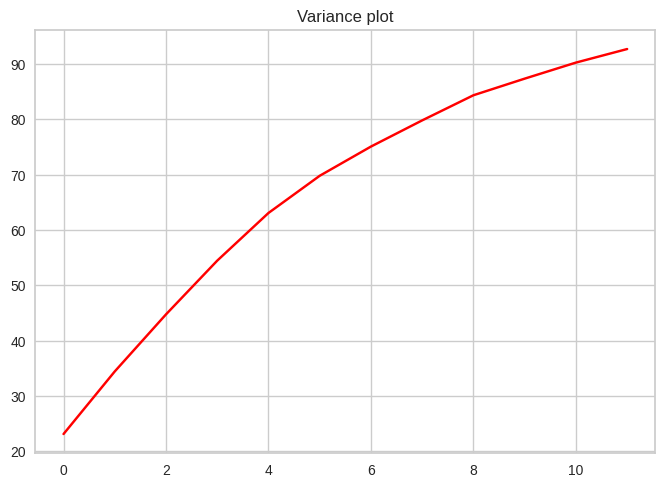

In [148]:
# Variance plot for PCA components obtained
plt.plot(var_Cum,color="red")
plt.title('Variance plot')
plt.show()

In [149]:
#Used for evaluation
db = []
sil = []

K-Means method

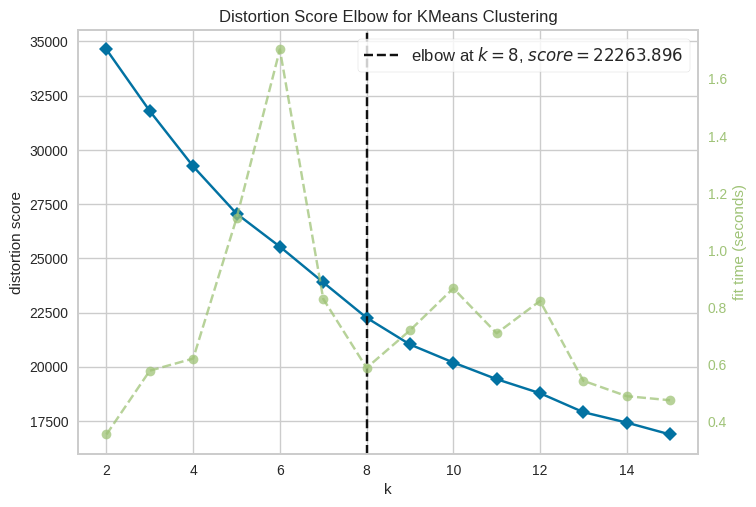

In [150]:
visualizer = KElbowVisualizer(KMeans(), k=15);
visualizer.fit(pca_values);
visualizer.show();

In [151]:
model_kmeans = KMeans(n_clusters=8, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(pca_values)

In [152]:
y_predict_kmeans

array([5, 2, 3, ..., 3, 5, 2], dtype=int32)

In [153]:
db.append(davies_bouldin_score(pca_values, model_kmeans.labels_))
sil.append(silhouette_score(pca_values, model_kmeans.labels_))

DBSCAN

In [154]:
dbscan = DBSCAN(eps=3, min_samples=3)
dbscan.fit_predict(pca_values)

array([0, 0, 0, ..., 0, 0, 0])

In [155]:
print(dbscan.labels_)

[0 0 0 ... 0 0 0]


In [156]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])
cl

,cluster
0,0
1,0
2,0
3,1
4,0
...,...
2213,0
2214,0
2215,0
2216,0


In [157]:
df_dbscan = pd.concat([df,cl],axis=1)

In [158]:
df_dbscan["cluster"].value_counts()

 0.0    1864
 1.0     275
-1.0      25
 2.0      20
 7.0      11
 5.0       8
 3.0       7
 4.0       5
 6.0       3
Name: cluster, dtype: int64

Here data is been clustered into 8 clusters, and 25 records marked as noise.

In [159]:
db.append(davies_bouldin_score(pca_values, dbscan.labels_))
sil.append(silhouette_score(pca_values, dbscan.labels_))

Agglomerative clustering

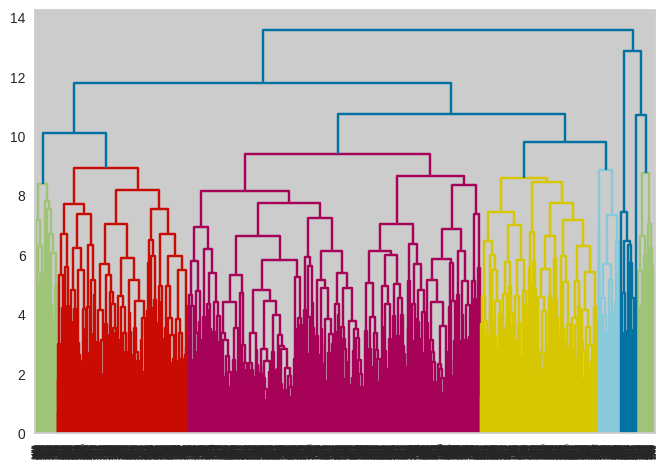

In [160]:
dendrogram = sch.dendrogram(sch.linkage(pca_values, method='complete'))

In [161]:
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'complete')

In [162]:
hc.fit(pca_values)

AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=5)

In [163]:
y_hc = hc.fit_predict(pca_values)
y_hc

array([1, 4, 3, ..., 1, 1, 4])

In [164]:
df_agglo=df.copy()

In [165]:
df_agglo['h_clusterid'] = y_hc

In [166]:
df_agglo['h_clusterid'].value_counts()

4    1045
1     550
3     501
0      68
2      54
Name: h_clusterid, dtype: int64

In [167]:
db.append(davies_bouldin_score(pca_values, hc.labels_))
sil.append(silhouette_score(pca_values, hc.labels_))

Evaluation

In [168]:
res = pd.DataFrame({'Davies Bouldin Index (Lower is better)': db, 'Silhouette Index (Higher is better)': sil}, index=['KMeans', 'DBSCAN', 'Agglomerative'])
res.index.names = ['Algorithm']
res

,Davies Bouldin Index (Lower is better),Silhouette Index (Higher is better)
Algorithm,,
KMeans,1.671662,0.185817
DBSCAN,1.683019,0.133328
Agglomerative,2.072829,0.133888
